JMJ+

In [ ]:
# importing libraries
import pandas as pd
import io

import prophet
from prophet import Prophet

In [ ]:
from google.colab import files 
 
uploaded = files.upload()

Saving df2.csv to df2.csv


In [ ]:
# Reading the file

df2 = pd.read_csv(io.BytesIO(uploaded['df2.csv']))

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      550 non-null    object 
 1   Chinese   550 non-null    float64
 2   English   550 non-null    float64
 3   French    550 non-null    float64
 4   German    550 non-null    float64
 5   Japanese  550 non-null    float64
 6   Other     550 non-null    float64
 7   Russian   550 non-null    float64
 8   Spanish   550 non-null    float64
dtypes: float64(8), object(1)
memory usage: 38.8+ KB


### Note: Forecasting is done for English pages only!

In [ ]:
# Convertind date to datetime format
df2["Date"] = pd.to_datetime(df2["Date"])

# Extracting 'Date','English' to separate df
df_prophet=df2[['Date','English']]

# Renaming the columns
df_prophet.columns = ['ds', 'y']
df_prophet.head(3)

,ds,y
0,2015-07-01,8.471219e+07
1,2015-07-02,8.443924e+07
2,2015-07-03,8.016843e+07


DEBUG:cmdstanpy:input tempfile: /tmp/tmpz46c51g8/cemypsot.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz46c51g8/narsf1ei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18702', 'data', 'file=/tmp/tmpz46c51g8/cemypsot.json', 'init=/tmp/tmpz46c51g8/narsf1ei.json', 'output', 'file=/tmp/tmpz46c51g8/prophet_model8c411eeo/prophet_model-20221208121536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:15:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


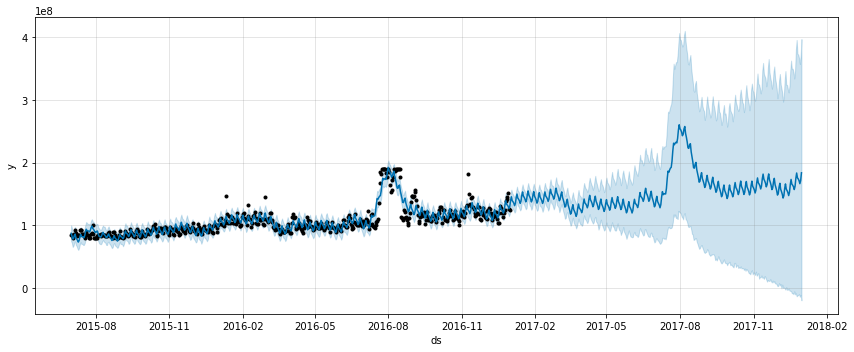

In [ ]:
# Creating the model
m = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode='multiplicative')

# Fitting the model
m.fit(df_prophet)

# Making forecast for next year
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

# Plotting the forecast
fig1 = m.plot(forecast, uncertainty=True, figsize=(12,5))

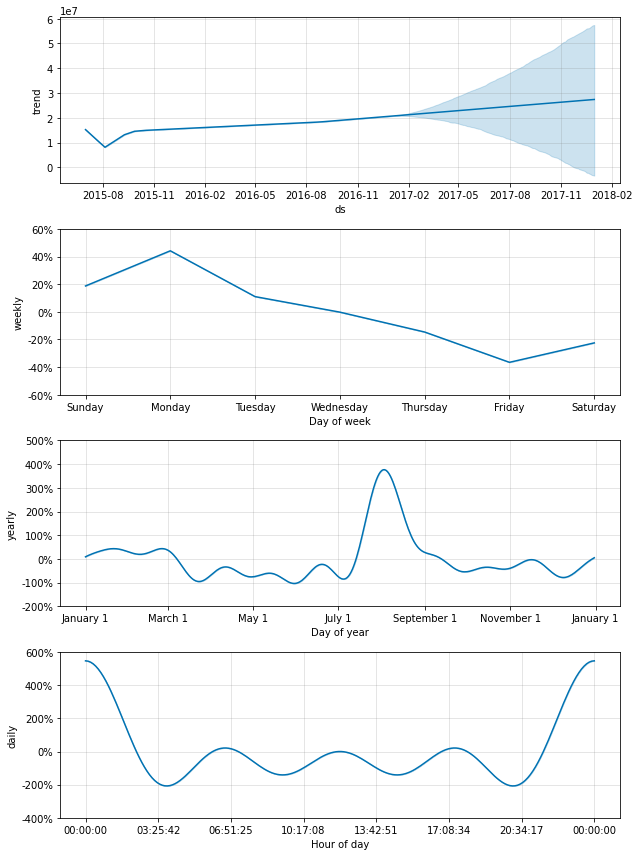

In [ ]:
# Plotting different components
fig2 = m.plot_components(forecast)

In [ ]:
# Forecast values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)


,ds,yhat,yhat_lower,yhat_upper
912,2017-12-29,1.664305e+08,-2.152525e+07,3.512932e+08
913,2017-12-30,1.713947e+08,-2.273389e+07,3.570290e+08
914,2017-12-31,1.837400e+08,-2.353432e+07,3.866769e+08


### Observations from prophet model:

1.   Forecasting confidence level is good upto 6 months, post that confidence level decreases

2.   English webpages have a small upward trend(slow growth trend)

3. During weekend, the traffic rises, whereas its lower during other days

4. July-August witness spike in traffic, in other months its comparitively lower

5. On a hourly basis, traffic is higher between the timeframe of 20:00 to 00.00
### JMJ+